In [169]:
import os
import numpy as np
import pydicom as dicom
import cv2
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

In [100]:
train_dir = "/home/paul/Sort_files/code/embolism"

In [101]:
train_data = os.path.join(train_dir + "/data")
train_data

'/home/paul/Sort_files/code/embolism/data'

In [102]:
os.listdir(train_dir)

['README.md',
 'data',
 '.git',
 '.gitignore',
 'venv',
 'PATIENT_DATA',
 'notebook.ipynb',
 'requirements.txt',
 'test_notebook1.ipynb']

In [103]:
images = os.listdir(train_data)
images

['1.3.12.2.1107.5.1.4.39260.30000022072709202073400022227.dcm',
 '1.3.12.2.1107.5.1.4.39260.30000022072709202073400022190.dcm',
 '1.3.12.2.1107.5.1.4.39260.30000022072709202073400022198.dcm',
 '1.3.12.2.1107.5.1.4.39260.30000022072709202073400022248.dcm',
 '1.3.12.2.1107.5.1.4.39260.30000022072709202073400022192.dcm',
 '1.3.12.2.1107.5.1.4.39260.30000022072709202073400022213.dcm',
 '1.3.12.2.1107.5.1.4.39260.30000022072709202073400022225.dcm',
 '1.3.12.2.1107.5.1.4.39260.30000022072709202073400022189.dcm',
 '1.3.12.2.1107.5.1.4.39260.30000022072709202073400022251.dcm',
 '1.3.12.2.1107.5.1.4.39260.30000022072709202073400022242.dcm',
 '1.3.12.2.1107.5.1.4.39260.30000022072709202073400022217.dcm',
 '1.3.12.2.1107.5.1.4.39260.30000022072709202073400022273.dcm',
 '1.3.12.2.1107.5.1.4.39260.30000022072709202073400022262.dcm',
 '1.3.12.2.1107.5.1.4.39260.30000022072709202073400022263.dcm',
 '1.3.12.2.1107.5.1.4.39260.30000022072709202073400022209.dcm',
 '1.3.12.2.1107.5.1.4.39260.300000220727

In [104]:
train_data

'/home/paul/Sort_files/code/embolism/data'

In [105]:
images[0]

'1.3.12.2.1107.5.1.4.39260.30000022072709202073400022227.dcm'

```
    !pip install pylibjpeg pylibjpeg-libjpeg pylibjpeg-openjpeg
```

### Visualize Image 

In [106]:
from clustimage import Clustimage
import clustimage
print(clustimage.__version__)

1.5.20


In [107]:
train_data

'/home/paul/Sort_files/code/embolism/data'

In [108]:
images[:3]

['1.3.12.2.1107.5.1.4.39260.30000022072709202073400022227.dcm',
 '1.3.12.2.1107.5.1.4.39260.30000022072709202073400022190.dcm',
 '1.3.12.2.1107.5.1.4.39260.30000022072709202073400022198.dcm']

In [109]:
# Initialize
cl = Clustimage()

pathnames = []
# Load example dataset
for dcm in images:
    image_path = os.path.join(train_data + "/" + dcm)
    pathnames.append(image_path)

print('\n', pathnames)

[clustimage] >INFO> filepath is set to [/tmp/clustimage]
[clustimage] >INFO> filepath is set to [/tmp/clustimage]
[clustimage] >INFO> filepath is set to [/tmp/clustimage]



 ['/home/paul/Sort_files/code/embolism/data/1.3.12.2.1107.5.1.4.39260.30000022072709202073400022227.dcm', '/home/paul/Sort_files/code/embolism/data/1.3.12.2.1107.5.1.4.39260.30000022072709202073400022190.dcm', '/home/paul/Sort_files/code/embolism/data/1.3.12.2.1107.5.1.4.39260.30000022072709202073400022198.dcm', '/home/paul/Sort_files/code/embolism/data/1.3.12.2.1107.5.1.4.39260.30000022072709202073400022248.dcm', '/home/paul/Sort_files/code/embolism/data/1.3.12.2.1107.5.1.4.39260.30000022072709202073400022192.dcm', '/home/paul/Sort_files/code/embolism/data/1.3.12.2.1107.5.1.4.39260.30000022072709202073400022213.dcm', '/home/paul/Sort_files/code/embolism/data/1.3.12.2.1107.5.1.4.39260.30000022072709202073400022225.dcm', '/home/paul/Sort_files/code/embolism/data/1.3.12.2.1107.5.1.4.39260.30000022072709202073400022189.dcm', '/home/paul/Sort_files/code/embolism/data/1.3.12.2.1107.5.1.4.39260.30000022072709202073400022251.dcm', '/home/paul/Sort_files/code/embolism/data/1.3.12.2.1107.5.1.4

> Visualize one image

[ 0 74 62 ...  0  0  0]


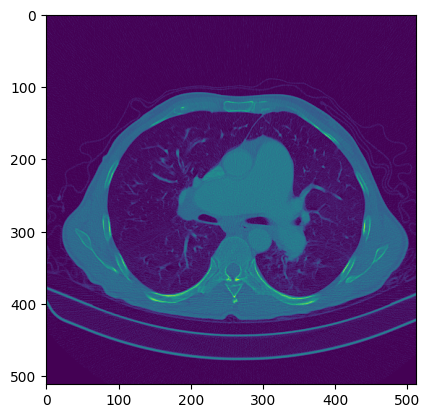

In [110]:
# Preprocessing of the first image
# 0: cv2.IMREAD_GRAYSCALE
# 1: cv2.IMREAD_COLOR
# img = cl.imread(pathnames[0], dim=(512, 512), flatten=False)

ds_ = dicom.dcmread(pathnames[0])

img_array_ = ds_.pixel_array

# Flattened array
print(img_array_.flatten())

plt.imshow(img_array_)

#### extract HOG features

### Cluster the Medical Dataset

In [160]:
data_arr = []

for img_arr in pathnames:
    ds = dicom.dcmread(img_arr)
    img_array = ds.pixel_array
    img_array = img_array.flatten()
    data_arr.append(img_array)
    
print(data_arr[0])

[ 0 74 62 ...  0  0  0]


In [166]:
X = np.array(data_arr)

# Define the number of clusters
num_clusters = 4

# Apply K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

# Get cluster labels
labels = kmeans.labels_

12


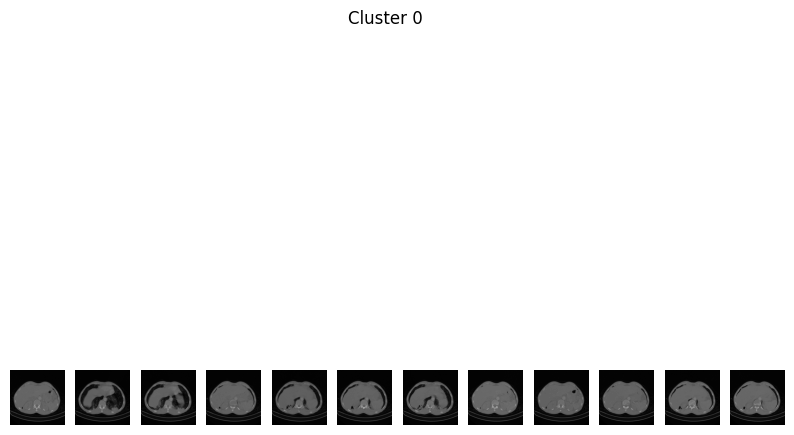

40


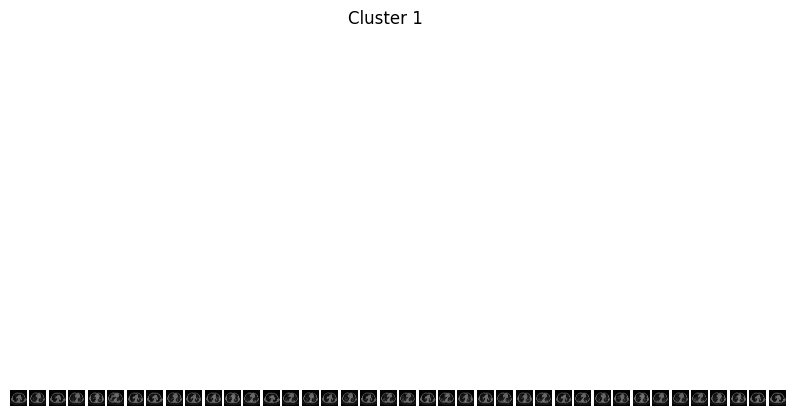

18


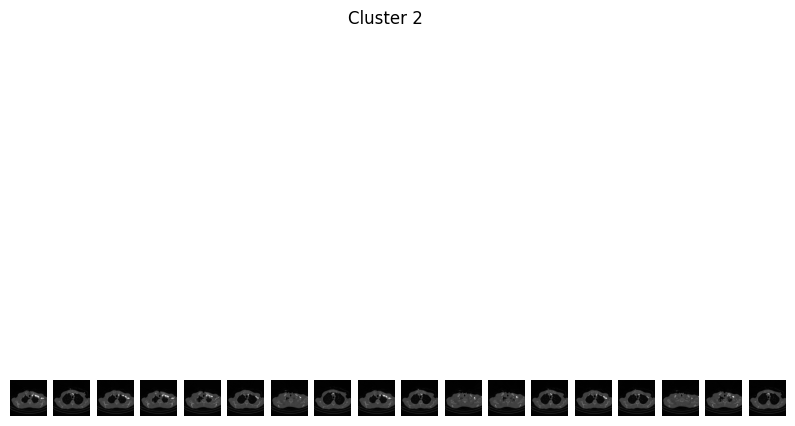

22


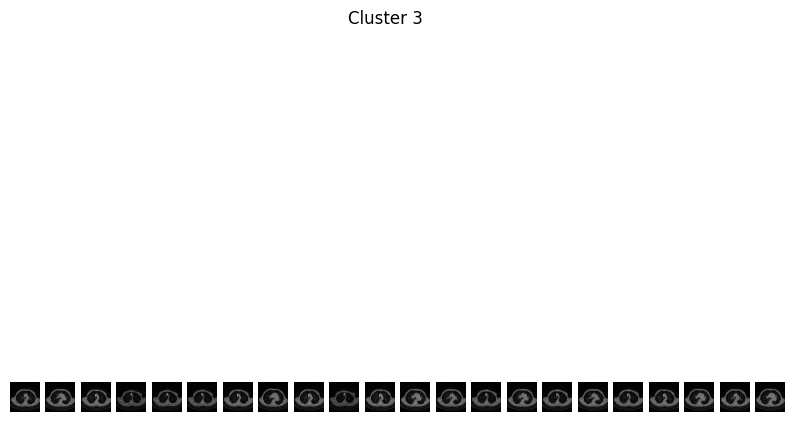

In [168]:
# Plot clusters (for demonstration purposes, you may want to adapt this for DICOM images)
for cluster_id in range(num_clusters):
    cluster_images = X[labels == cluster_id]
    print(len(cluster_images))
    fig, axes = plt.subplots(1, len(cluster_images), figsize=(10, 8))
    for i, image in enumerate(cluster_images):
        axes[i].imshow(image.reshape(512, 512), cmap='gray')  # Assuming image size is 128x128
        axes[i].axis('off')
    plt.suptitle(f'Cluster {cluster_id}')
    plt.show()

In [172]:
# Assuming you have ground truth labels stored in a variable called 'true_labels'
true_labels = [x for x in range(92)] # Example ground truth labels

# Calculate accuracy
accuracy = accuracy_score(true_labels, labels)

print("Accuracy:", accuracy)

Accuracy: 0.010869565217391304
